# Nuages de mots

## Imports et stopwords

In [7]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "rue", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het","autre", "jusqu", "ville", "rossel", "brux", "bruxelles",
       "Bruxelles", "des", "du", "tÃ©l","tél", "rue", "app", "ans", "prix", "dem", "part", "très", "gar", "terr", 
       "heures", "cuis", "agence", "ecrire", "avenue", "service", "mois", "villa", "cours", "bon", 
       "centre", "téléph", "demande", "temps", "samedi", "jours", "peu", "leurs", "louise",
       "prés", "dimanche", "premier", "monsieur", "midi", "conf", "liv", "belge", "mer", "france", "vis", "jean", "avant", 
       "madame", "enfants", "président", "jour", "mod", "bilingue", "chb", "quelques", "première", "louer", "eau", "grande", 
       "vue", "ecr", "bonne", "lundi", "semaine", "lieu", "sdb", "près", "matin", "musique", "fin", "offre", "chff", "vers", 
       "tour", "fois", "toute", "année", "vendre", "appart", "lux", "partir", "bur", "neuf", "engage", "porte", "bel", 
       "trav", "ares", "soir", "Soir", "grand", "place"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [9]:
# Choisir une année
year = 1968

In [15]:
# Lister les fichiers de ce cluster
data_path = '../data'
txt_path = '../data/txt'
file_list_name = 'liste_cluster0.txt'
txts = []
with open(data_path+'/'+file_list_name, 'r', encoding="utf-8") as f:
        txts.append(f.read())
# txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
# txts

In [16]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(txt_path+'/'+ txt, 'r', encoding="utf-8") as f:
      content_list.append(f.read())

FileNotFoundError: [Errno 2] No such file or directory: '../data/txt/KB_JB838_1960-01-12_01-00011.txt\nKB_JB838_1960-01-13_01-00009.txt\nKB_JB838_1960-02-19_01-00011.txt\nKB_JB838_1960-03-04_01-00010.txt\nKB_JB838_1960-03-12_01-00007.txt\nKB_JB838_1960-03-13_01-00009.txt\nKB_JB838_1960-03-18_01-00009.txt\nKB_JB838_1960-05-27_01-00007.txt\nKB_JB838_1960-05-28_01-00008.txt\nKB_JB838_1960-06-23_01-00010.txt\nKB_JB838_1960-07-13_01-00012.txt\nKB_JB838_1960-08-27_01-00011.txt\nKB_JB838_1960-10-30_01-00007.txt\nKB_JB838_1960-11-01_01-00013.txt\nKB_JB838_1960-12-06_01-00011.txt\nKB_JB838_1961-02-12_01-00012.txt\nKB_JB838_1961-02-21_01-00013.txt\nKB_JB838_1961-03-07_01-00006.txt\nKB_JB838_1961-03-31_01-00010.txt\nKB_JB838_1961-04-30_01-00007.txt\nKB_JB838_1961-08-27_01-00008.txt\nKB_JB838_1961-10-08_01-00011.txt\nKB_JB838_1961-10-29_01-00012.txt\nKB_JB838_1962-01-25_01-00009.txt\nKB_JB838_1962-02-20_01-00011.txt\nKB_JB838_1962-03-04_01-00011.txt\nKB_JB838_1962-03-27_01-00008.txt\nKB_JB838_1962-05-19_01-00011.txt\nKB_JB838_1962-06-24_01-00010.txt\nKB_JB838_1962-06-27_01-00010.txt\nKB_JB838_1962-07-08_01-00012.txt\nKB_JB838_1962-07-23_01-00010.txt\nKB_JB838_1962-08-08_01-00010.txt\nKB_JB838_1962-08-26_01-00011.txt\nKB_JB838_1962-09-11_01-00009.txt\nKB_JB838_1962-09-26_01-00009.txt\nKB_JB838_1962-10-14_01-00011.txt\nKB_JB838_1962-10-26_01-00011.txt\nKB_JB838_1962-12-11_01-00010.txt\nKB_JB838_1962-12-18_01-00009.txt\nKB_JB838_1962-12-27_01-00009.txt\nKB_JB838_1963-05-05_01-00011.txt\nKB_JB838_1963-05-18_01-00011.txt\nKB_JB838_1963-06-11_01-00010.txt\nKB_JB838_1963-07-28_01-00010.txt\nKB_JB838_1963-08-14_01-00008.txt\nKB_JB838_1963-08-29_01-00011.txt\nKB_JB838_1963-09-08_01-00011.txt\nKB_JB838_1963-10-01_01-00009.txt\nKB_JB838_1963-11-20_01-00011.txt\nKB_JB838_1963-12-15_01-00011.txt\nKB_JB838_1964-02-13_01-00012.txt\nKB_JB838_1964-02-29_01-00011.txt\nKB_JB838_1964-03-08_01-00013.txt\nKB_JB838_1964-03-22_01-00012.txt\nKB_JB838_1964-04-05_01-00014.txt\nKB_JB838_1964-05-12_01-00010.txt\nKB_JB838_1964-09-29_01-00010.txt\nKB_JB838_1964-11-06_01-00010.txt\nKB_JB838_1964-11-22_01-00012.txt\nKB_JB838_1964-11-27_01-00013.txt\nKB_JB838_1964-12-05_01-00009.txt\nKB_JB838_1965-01-31_01-00014.txt\nKB_JB838_1965-02-09_01-00009.txt\nKB_JB838_1965-05-22_01-00012.txt\nKB_JB838_1965-06-02_01-00012.txt\nKB_JB838_1965-06-13_01-00012.txt\nKB_JB838_1965-09-19_01-00011.txt\nKB_JB838_1965-10-15_01-00010.txt\nKB_JB838_1965-10-17_01-00013.txt\nKB_JB838_1965-10-19_01-00009.txt\nKB_JB838_1965-12-23_01-00011.txt\nKB_JB838_1965-12-28_01-00010.txt\nKB_JB838_1966-05-29_01-00013.txt\nKB_JB838_1966-06-16_01-00010.txt\nKB_JB838_1966-07-24_01-00009.txt\nKB_JB838_1966-07-26_01-00013.txt\nKB_JB838_1966-09-16_01-00011.txt\nKB_JB838_1966-11-19_01-00010.txt\nKB_JB838_1966-12-08_01-00012.txt\nKB_JB838_1966-12-25_01-00013.txt\nKB_JB838_1967-03-15_01-00011.txt\nKB_JB838_1967-04-26_01-00012.txt\nKB_JB838_1967-04-30_01-00010.txt\nKB_JB838_1967-05-14_01-00013.txt\nKB_JB838_1967-07-13_01-00012.txt\nKB_JB838_1967-07-23_01-00011.txt\nKB_JB838_1967-09-27_01-00012.txt\nKB_JB838_1967-11-03_01-00011.txt\nKB_JB838_1968-02-06_01-00011.txt\nKB_JB838_1968-02-11_01-00013.txt\nKB_JB838_1968-02-14_01-00012.txt\nKB_JB838_1968-02-29_01-00011.txt\nKB_JB838_1968-03-30_01-00012.txt\nKB_JB838_1968-06-30_01-00017.txt\nKB_JB838_1968-07-30_01-00012.txt\nKB_JB838_1968-08-04_01-00012.txt\nKB_JB838_1968-09-13_01-00010.txt\nKB_JB838_1968-12-06_01-00011.txt\nKB_JB838_1969-01-05_01-00012.txt\nKB_JB838_1969-01-11_01-00010.txt\nKB_JB838_1969-02-22_01-00011.txt\nKB_JB838_1969-03-18_01-00014.txt\nKB_JB838_1969-04-08_01-00014.txt\nKB_JB838_1969-04-13_01-00013.txt\nKB_JB838_1969-04-27_01-00011.txt\nKB_JB838_1969-04-29_01-00016.txt\nKB_JB838_1969-06-26_01-00012.txt\nKB_JB838_1969-09-11_01-00010.txt\nKB_JB838_1969-10-19_01-00011.txt\nKB_JB838_1969-10-26_01-00011.txt\n'

In [ ]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

FileNotFoundError: [Errno 2] No such file or directory: '../data/txt\\KB_JB838_1960-01-12_01-00011.txt\nKB_JB838_1960-01-13_01-00009.txt\nKB_JB838_1960-02-19_01-00011.txt\nKB_JB838_1960-03-04_01-00010.txt\nKB_JB838_1960-03-12_01-00007.txt\nKB_JB838_1960-03-13_01-00009.txt\nKB_JB838_1960-03-18_01-00009.txt\nKB_JB838_1960-05-27_01-00007.txt\nKB_JB838_1960-05-28_01-00008.txt\nKB_JB838_1960-06-23_01-00010.txt\nKB_JB838_1960-07-13_01-00012.txt\nKB_JB838_1960-08-27_01-00011.txt\nKB_JB838_1960-10-30_01-00007.txt\nKB_JB838_1960-11-01_01-00013.txt\nKB_JB838_1960-12-06_01-00011.txt\nKB_JB838_1961-02-12_01-00012.txt\nKB_JB838_1961-02-21_01-00013.txt\nKB_JB838_1961-03-07_01-00006.txt\nKB_JB838_1961-03-31_01-00010.txt\nKB_JB838_1961-04-30_01-00007.txt\nKB_JB838_1961-08-27_01-00008.txt\nKB_JB838_1961-10-08_01-00011.txt\nKB_JB838_1961-10-29_01-00012.txt\nKB_JB838_1962-01-25_01-00009.txt\nKB_JB838_1962-02-20_01-00011.txt\nKB_JB838_1962-03-04_01-00011.txt\nKB_JB838_1962-03-27_01-00008.txt\nKB_JB838_1962-05-19_01-00011.txt\nKB_JB838_1962-06-24_01-00010.txt\nKB_JB838_1962-06-27_01-00010.txt\nKB_JB838_1962-07-08_01-00012.txt\nKB_JB838_1962-07-23_01-00010.txt\nKB_JB838_1962-08-08_01-00010.txt\nKB_JB838_1962-08-26_01-00011.txt\nKB_JB838_1962-09-11_01-00009.txt\nKB_JB838_1962-09-26_01-00009.txt\nKB_JB838_1962-10-14_01-00011.txt\nKB_JB838_1962-10-26_01-00011.txt\nKB_JB838_1962-12-11_01-00010.txt\nKB_JB838_1962-12-18_01-00009.txt\nKB_JB838_1962-12-27_01-00009.txt\nKB_JB838_1963-05-05_01-00011.txt\nKB_JB838_1963-05-18_01-00011.txt\nKB_JB838_1963-06-11_01-00010.txt\nKB_JB838_1963-07-28_01-00010.txt\nKB_JB838_1963-08-14_01-00008.txt\nKB_JB838_1963-08-29_01-00011.txt\nKB_JB838_1963-09-08_01-00011.txt\nKB_JB838_1963-10-01_01-00009.txt\nKB_JB838_1963-11-20_01-00011.txt\nKB_JB838_1963-12-15_01-00011.txt\nKB_JB838_1964-02-13_01-00012.txt\nKB_JB838_1964-02-29_01-00011.txt\nKB_JB838_1964-03-08_01-00013.txt\nKB_JB838_1964-03-22_01-00012.txt\nKB_JB838_1964-04-05_01-00014.txt\nKB_JB838_1964-05-12_01-00010.txt\nKB_JB838_1964-09-29_01-00010.txt\nKB_JB838_1964-11-06_01-00010.txt\nKB_JB838_1964-11-22_01-00012.txt\nKB_JB838_1964-11-27_01-00013.txt\nKB_JB838_1964-12-05_01-00009.txt\nKB_JB838_1965-01-31_01-00014.txt\nKB_JB838_1965-02-09_01-00009.txt\nKB_JB838_1965-05-22_01-00012.txt\nKB_JB838_1965-06-02_01-00012.txt\nKB_JB838_1965-06-13_01-00012.txt\nKB_JB838_1965-09-19_01-00011.txt\nKB_JB838_1965-10-15_01-00010.txt\nKB_JB838_1965-10-17_01-00013.txt\nKB_JB838_1965-10-19_01-00009.txt\nKB_JB838_1965-12-23_01-00011.txt\nKB_JB838_1965-12-28_01-00010.txt\nKB_JB838_1966-05-29_01-00013.txt\nKB_JB838_1966-06-16_01-00010.txt\nKB_JB838_1966-07-24_01-00009.txt\nKB_JB838_1966-07-26_01-00013.txt\nKB_JB838_1966-09-16_01-00011.txt\nKB_JB838_1966-11-19_01-00010.txt\nKB_JB838_1966-12-08_01-00012.txt\nKB_JB838_1966-12-25_01-00013.txt\nKB_JB838_1967-03-15_01-00011.txt\nKB_JB838_1967-04-26_01-00012.txt\nKB_JB838_1967-04-30_01-00010.txt\nKB_JB838_1967-05-14_01-00013.txt\nKB_JB838_1967-07-13_01-00012.txt\nKB_JB838_1967-07-23_01-00011.txt\nKB_JB838_1967-09-27_01-00012.txt\nKB_JB838_1967-11-03_01-00011.txt\nKB_JB838_1968-02-06_01-00011.txt\nKB_JB838_1968-02-11_01-00013.txt\nKB_JB838_1968-02-14_01-00012.txt\nKB_JB838_1968-02-29_01-00011.txt\nKB_JB838_1968-03-30_01-00012.txt\nKB_JB838_1968-06-30_01-00017.txt\nKB_JB838_1968-07-30_01-00012.txt\nKB_JB838_1968-08-04_01-00012.txt\nKB_JB838_1968-09-13_01-00010.txt\nKB_JB838_1968-12-06_01-00011.txt\nKB_JB838_1969-01-05_01-00012.txt\nKB_JB838_1969-01-11_01-00010.txt\nKB_JB838_1969-02-22_01-00011.txt\nKB_JB838_1969-03-18_01-00014.txt\nKB_JB838_1969-04-08_01-00014.txt\nKB_JB838_1969-04-13_01-00013.txt\nKB_JB838_1969-04-27_01-00011.txt\nKB_JB838_1969-04-29_01-00016.txt\nKB_JB838_1969-06-26_01-00012.txt\nKB_JB838_1969-09-11_01-00010.txt\nKB_JB838_1969-10-19_01-00011.txt\nKB_JB838_1969-10-26_01-00011.txt\n'

In [ ]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [ ]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [ ]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1968_clean.txt!'

In [ ]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'janvier triomphe britannique union critique cinéma accident joseph losey emporte extrême justesse privilège peter watkins ment décidés rendre points adversaire souriante autorité olivier delville empêcha débats parfois assez caustiques prennent désagréable anglophiles seuls sourire vraiment victoire allait échanper made bri tain issue tours scrutin parler innombrables votes indicatifs seule uti propos fumants fumeux invectives dithyrambes bonnes raisons mauvaise foi manœuvres habiles envolées ly'

## Nuage de mots

### Afficher les termes les plus fréquents


In [ ]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('saint', 310), ('pays', 262), ('maison', 260), ('belgique', 254), ('libre', 252), ('francs', 244), ('liège', 220), ('jeune', 209), ('travail', 206), ('état', 204), ('français', 203), ('monde', 183), ('etc', 182), ('vitae', 182), ('pers', 182), ('quatre', 179), ('bureau', 178), ('vente', 178), ('parc', 178), ('partie', 175), ('pierre', 174), ('fiat', 174), ('août', 173), ('voiture', 171), ('octobre', 171), ('sud', 167), ('présenter', 167), ('alors', 164), ('situation', 164), ('cft', 164), ('tel', 163), ('terrain', 162), ('petit', 161), ('juin', 160), ('course', 160), ('jard', 158), ('garage', 158), ('uccle', 157), ('conseil', 157), ('anvers', 156), ('dactylo', 156), ('etat', 155), ('nouvelle', 155), ('jeudi', 155), ('travaux', 153), ('étage', 153), ('mardi', 153), ('cherche', 153), ('déjà', 152), ('marché', 152), ('frs', 152), ('gand', 151), ('programme', 150), ('ministre', 150), ('europe', 149), ('beaux', 148), ('société', 148), ('importante', 148), ('général', 148), ('ordre', 148), 

### Créer, stocker et afficher le nuage de mots

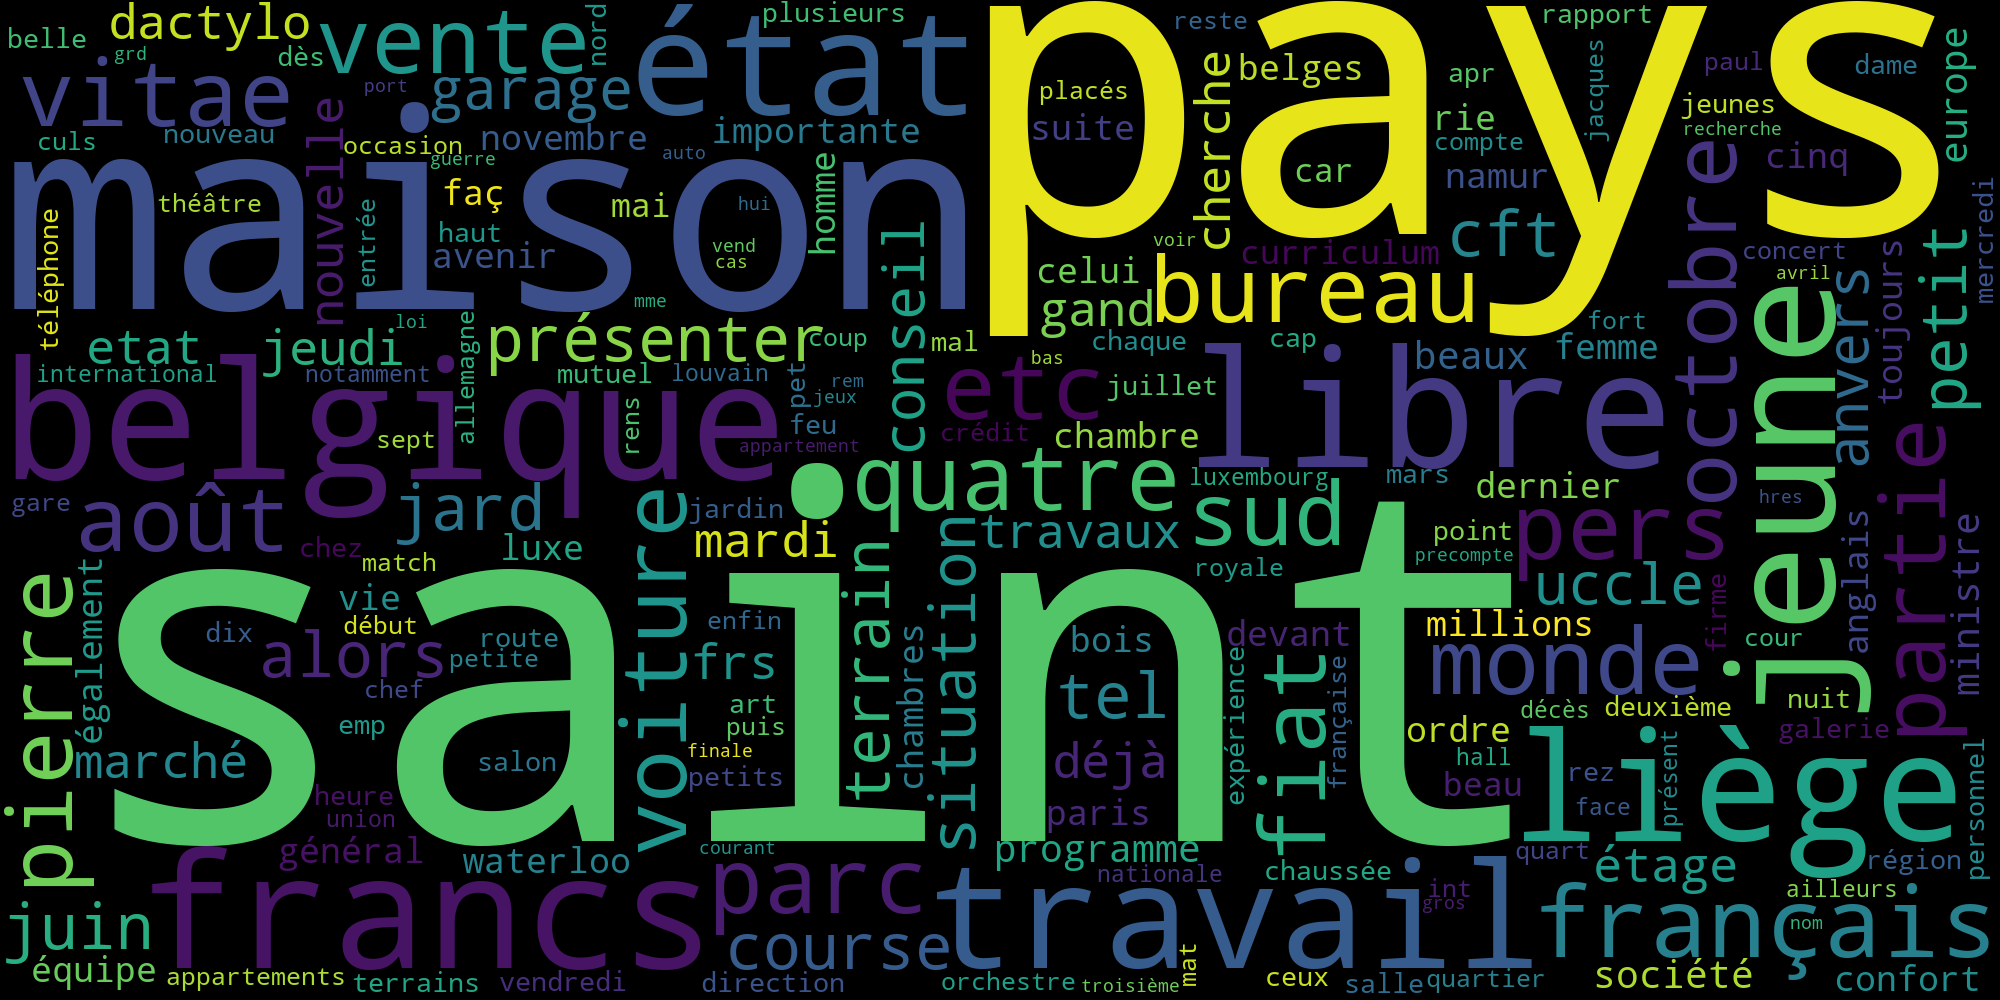

In [ ]:
cloud = WordCloud(width=2000, height=1000, background_color='black').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))